# Stock prices

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib

In [4]:
import requests

In [13]:
def fix_datetime_on_dataframe(df):
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(keys='date', inplace=True)

In [14]:
def create_stock_df_of_company(company_code):
    url = f'https://iex.lewagon.com/stable/stock/{company_code}/chart/3m'
    df = pd.read_json(url)
    fix_datetime_on_dataframe(df)
    df['company_code'] = company_code
    return df

In [5]:
 url = 'https://iex.lewagon.com/stable/stock/aapl/chart/3m'

In [6]:
api_data = requests.get(url).json()

In [7]:
api_data

[{'close': 147.07,
  'high': 151.57,
  'low': 146.7,
  'open': 150.74,
  'priceDate': '2022-07-18',
  'symbol': 'AAPL',
  'volume': 81420868,
  'id': 'HISTORICAL_PRICES',
  'key': 'AAPL',
  'subkey': '',
  'date': '2022-07-18',
  'updated': 1660174260000,
  'changeOverTime': 0,
  'marketChangeOverTime': 0,
  'uOpen': 150.74,
  'uClose': 147.07,
  'uHigh': 151.57,
  'uLow': 146.7,
  'uVolume': 81420868,
  'fOpen': 150.531,
  'fClose': 146.866,
  'fHigh': 151.36,
  'fLow': 146.497,
  'fVolume': 81420868,
  'label': 'Jul 18, 22',
  'change': 0,
  'changePercent': 0},
 {'close': 151,
  'high': 151.23,
  'low': 146.91,
  'open': 147.92,
  'priceDate': '2022-07-19',
  'symbol': 'AAPL',
  'volume': 82982367,
  'id': 'HISTORICAL_PRICES',
  'key': 'AAPL',
  'subkey': '',
  'date': '2022-07-19',
  'updated': 1660174260000,
  'changeOverTime': 0.026721969130346142,
  'marketChangeOverTime': 0.026721969130346142,
  'uOpen': 147.92,
  'uClose': 151,
  'uHigh': 151.23,
  'uLow': 146.91,
  'uVolume':

In [7]:
apple_df = pd.DataFrame(api_data)

In [8]:
apple_df.head()

,close,high,low,open,priceDate,symbol,volume,id,key,subkey,...,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent
0,147.07,151.57,146.70,150.74,2022-07-18,AAPL,81420868,HISTORICAL_PRICES,AAPL,,...,146.70,81420868,150.531,146.866,151.360,146.497,81420868,"Jul 18, 22",0.00,0.0000
1,151.00,151.23,146.91,147.92,2022-07-19,AAPL,82982367,HISTORICAL_PRICES,AAPL,,...,146.91,82982367,147.715,150.791,151.020,146.706,82982367,"Jul 19, 22",3.93,0.0267
2,153.04,153.72,150.37,151.12,2022-07-20,AAPL,64823413,HISTORICAL_PRICES,AAPL,,...,150.37,64823413,150.910,152.828,153.507,150.161,64823413,"Jul 20, 22",2.04,0.0135
3,155.35,155.57,151.94,154.50,2022-07-21,AAPL,65086636,HISTORICAL_PRICES,AAPL,,...,151.94,65086636,154.286,155.135,155.354,151.729,65086636,"Jul 21, 22",2.31,0.0151
4,154.09,156.28,153.41,155.39,2022-07-22,AAPL,66675408,HISTORICAL_PRICES,AAPL,,...,153.41,66675408,155.175,153.876,156.063,153.197,66675408,"Jul 22, 22",-1.26,-0.0081


In [9]:
apple_df['date'] = pd.to_datetime(apple_df['date'])

In [10]:
apple_df.dtypes

close                          float64
high                           float64
low                            float64
open                           float64
priceDate                       object
symbol                          object
volume                           int64
id                              object
key                             object
subkey                          object
date                    datetime64[ns]
updated                          int64
changeOverTime                 float64
marketChangeOverTime           float64
uOpen                          float64
uClose                         float64
uHigh                          float64
uLow                           float64
uVolume                          int64
fOpen                          float64
fClose                         float64
fHigh                          float64
fLow                           float64
fVolume                          int64
label                           object
change                   

In [11]:
apple_df.set_index('date', inplace=True)

In [12]:
apple_df.head()

,close,high,low,open,priceDate,symbol,volume,id,key,subkey,...,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent
date,,,,,,,,,,,,,,,,,,,,,
2022-07-18,147.07,151.57,146.70,150.74,2022-07-18,AAPL,81420868,HISTORICAL_PRICES,AAPL,,...,146.70,81420868,150.531,146.866,151.360,146.497,81420868,"Jul 18, 22",0.00,0.0000
2022-07-19,151.00,151.23,146.91,147.92,2022-07-19,AAPL,82982367,HISTORICAL_PRICES,AAPL,,...,146.91,82982367,147.715,150.791,151.020,146.706,82982367,"Jul 19, 22",3.93,0.0267
2022-07-20,153.04,153.72,150.37,151.12,2022-07-20,AAPL,64823413,HISTORICAL_PRICES,AAPL,,...,150.37,64823413,150.910,152.828,153.507,150.161,64823413,"Jul 20, 22",2.04,0.0135
2022-07-21,155.35,155.57,151.94,154.50,2022-07-21,AAPL,65086636,HISTORICAL_PRICES,AAPL,,...,151.94,65086636,154.286,155.135,155.354,151.729,65086636,"Jul 21, 22",2.31,0.0151
2022-07-22,154.09,156.28,153.41,155.39,2022-07-22,AAPL,66675408,HISTORICAL_PRICES,AAPL,,...,153.41,66675408,155.175,153.876,156.063,153.197,66675408,"Jul 22, 22",-1.26,-0.0081


<AxesSubplot: xlabel='date'>

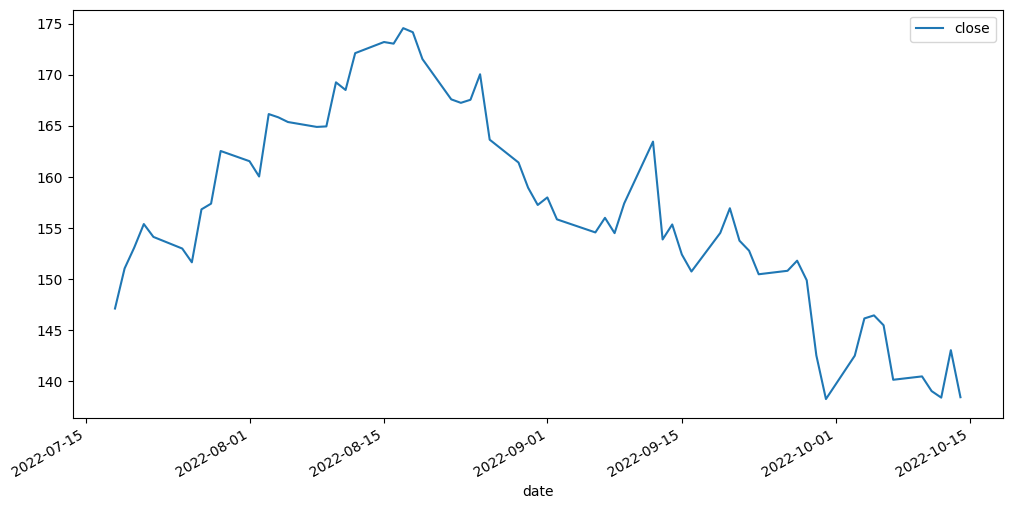

In [32]:
apple_df[['close']].plot(figsize=(12,6))

<AxesSubplot: xlabel='date'>

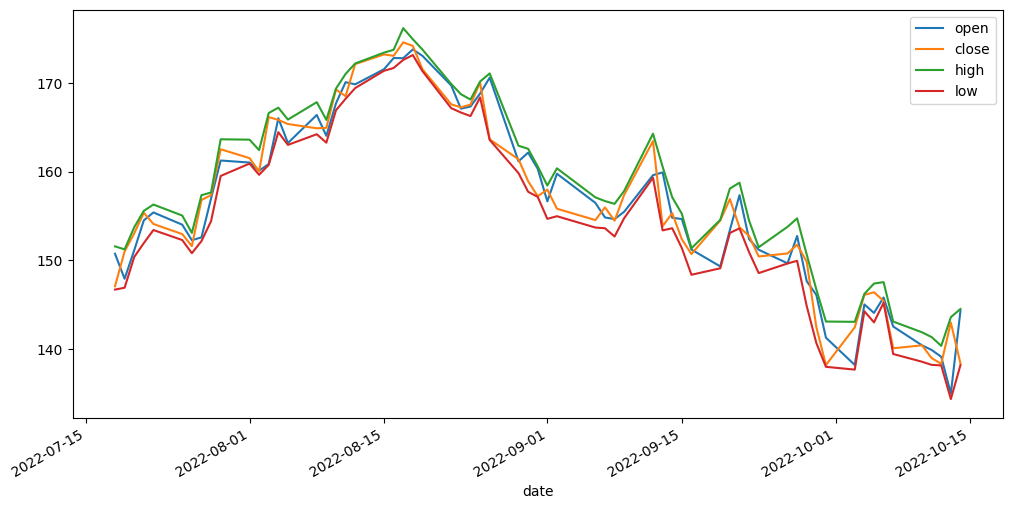

In [33]:
apple_df[['open', 'close', 'high', 'low' ]].plot(figsize=(12,6))

In [34]:
def fix_datetime_on_dataframe(df):
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    return df

In [35]:
def create_stock_df_of_company(company_code):
    url = f'https://iex.lewagon.com/stable/stock/{company_code}/chart/3m'
    df = pd.read_json(url)
    fix_datetime_on_dataframe(df)
    df['company_code'] = company_code
    return df

In [36]:
codes = ['aapl', 'amzn', 'googl','meta']
stock_dfs = [apple_df]
for code in codes:
    stock_dfs.append(create_stock_df_of_company(code))

In [37]:
stocks_df = pd.concat(stock_dfs)

In [38]:
# pivot the table to get the company_codes as columns
pivot_df = stocks_df.pivot(columns='company_code', values='close')

<AxesSubplot: xlabel='date'>

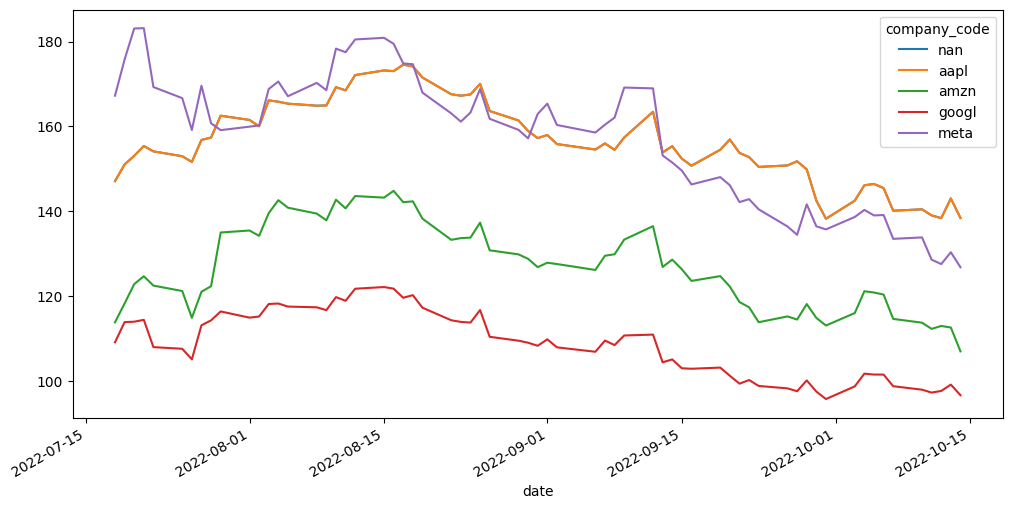

In [39]:
pivot_df.plot(kind='line', figsize=(12,6))

In [40]:
def normalize(series):
    return series/series[0]

normalized_pivot = pivot_df.apply(normalize, axis=0)

<AxesSubplot: xlabel='date'>

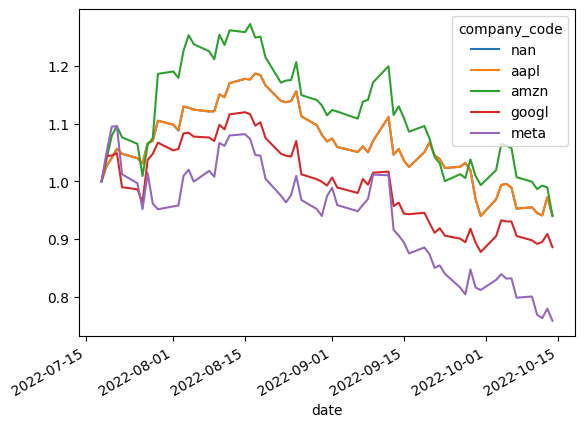

In [41]:
normalized_pivot.plot(kind='line')

In [46]:
apple_df.index

DatetimeIndex(['2022-07-18', '2022-07-19', '2022-07-20', '2022-07-21',
               '2022-07-22', '2022-07-25', '2022-07-26', '2022-07-27',
               '2022-07-28', '2022-07-29', '2022-08-01', '2022-08-02',
               '2022-08-03', '2022-08-04', '2022-08-05', '2022-08-08',
               '2022-08-09', '2022-08-10', '2022-08-11', '2022-08-12',
               '2022-08-15', '2022-08-16', '2022-08-17', '2022-08-18',
               '2022-08-19', '2022-08-22', '2022-08-23', '2022-08-24',
               '2022-08-25', '2022-08-26', '2022-08-29', '2022-08-30',
               '2022-08-31', '2022-09-01', '2022-09-02', '2022-09-06',
               '2022-09-07', '2022-09-08', '2022-09-09', '2022-09-12',
               '2022-09-13', '2022-09-14', '2022-09-15', '2022-09-16',
               '2022-09-19', '2022-09-20', '2022-09-21', '2022-09-22',
               '2022-09-23', '2022-09-26', '2022-09-27', '2022-09-28',
               '2022-09-29', '2022-09-30', '2022-10-03', '2022-10-04',
      